<a href="https://colab.research.google.com/github/pedro-de-bastos/CS166-Modeling-Simulation-and-Decision-Making/blob/main/CS166_PCW_Session_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pre-Class Work Session 19 (10.2 Dynamics on networks)

By: Pedro M. de Bastos


# Exercise 16.2

Revise the code above so that you can measure how many
steps it will take until the system reaches a consensus (i.e., homogenized state). Then run multiple simulations (Monte Carlo simulations) to calculate the average time length needed for consensus formation in the original voter model.

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import random as rd
import numpy as np

def initialize():
    global g
    g = nx.karate_club_graph()
    g.pos = nx.spring_layout(g)
    for i in g.nodes:
        g.nodes[i]['state'] = 1 if rd.random() < .5 else 0

def observe():
    global g
    cla()
    nx.draw(g, vmin = 0, vmax = 1,
            node_color = [g.nodes[i]['state'] for i in g.nodes],
            pos = g.pos)

def update():
    global g
    listener = rd.choice(list(g.nodes))
    speaker = rd.choice(list(g.neighbors(listener)))
    g.nodes[listener]['state'] = g.nodes[speaker]['state']


def update_reversed():
    global g
    speaker = rd.choice(list(g.nodes))
    listener = rd.choice(list(g.neighbors(speaker)))
    g.nodes[listener]['state'] = g.nodes[speaker]['state']

def update_edge():
    global g
    edge = rd.choice(list(g.edges))
    speaker = rd.choice(edge)
    listener = [j for j in edge if j != speaker][0]
    g.nodes[listener]['state'] = g.nodes[speaker]['state']


def ones_zeros(g):
    ones = 0
    zeros = 0
    for i in g.nodes():
        if g.nodes[i]['state'] == 1:
            ones += 1
        else:
            zeros += 1
    return ones, zeros

def run_experiment(update):
    initialize()
    ones, zeros = ones_zeros(g)


    steps = 0
    while ones != len(g.nodes()) and zeros != len(g.nodes()): #I update until there is consensus
        ones, zeros = ones_zeros(g)
        update()
        steps += 1
    return steps

The mean steps until consensus was 642.41


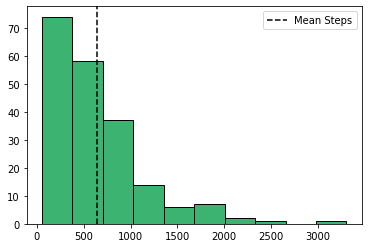

In [9]:
results = []

for i in range(200):
    results.append(run_experiment(update))

plt.hist(results, edgecolor = 'black', color = 'mediumseagreen')
plt.axvline(x = np.mean(results), color = 'black', ls = '--', label='Mean Steps')
print(f"The mean steps until consensus was {np.mean(results)}")
plt.legend()

# Exercise 16.3

Revise the code further to implement (1) the reversed and (2)
the edge-based voter models. Then conduct Monte Carlo simulations to measure the average time length needed for consensus formation in each case. Compare the results between the three versions.

The mean steps until consensus was 3287.17


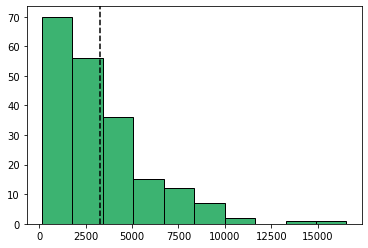

In [10]:
#Experiment for the reversed edge rule
results = []

for i in range(200):
    results.append(run_experiment(update_reversed))

plt.hist(results, edgecolor = 'black', color = 'mediumseagreen')
plt.axvline(x = np.mean(results), color = 'black', ls = '--', label='Mean Steps')
print(f"The mean steps until consensus was {np.mean(results)}")

The mean steps until consensus was 1060.765


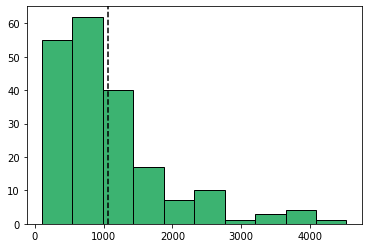

In [11]:
#Experiment for choosing the edge instead of one of the nodes
results = []

for i in range(200):
    results.append(run_experiment(update_edge))

plt.hist(results, edgecolor = 'black', color = 'mediumseagreen')
plt.axvline(x = np.mean(results), color = 'black', ls = '--', label='Mean Steps')
print(f"The mean steps until consensus was {np.mean(results)}")